# One layer Network asymptotics

For details, see blog post: https://rajatvd.github.io/NTK

In [1]:
from pylab import *
import scipy.stats as st
from tqdm import tqdm_notebook

In [2]:
import jax.numpy as jnp
from jax.nn import relu

In [3]:
rcParams['figure.figsize'] = 12,9
rcParams['axes.grid'] = True
rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 3
DEFAULT_COLORS = rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
def tanh(x):
    y = jnp.exp(-2.0 * x)
    return (1.0 - y) / (1.0 + y)

In [5]:
from jax import jit, jacfwd, jacrev, grad
def hessian(fun):
    return jacfwd(jacrev(fun))

The network:

In [6]:
def net(w, x=1.0):
    m = len(w)//2
    a = w[:m]
    b = w[m:]
    z = tanh(x*a)
#     print(z.shape)
#     z = x*a
#     print(z.std())
    return jnp.dot(z, b)
    

In [7]:
from functools import partial

In [8]:
h = hessian(partial(net, x=randn())) # the x value is fixed to a random value
g = jacrev(partial(net, x=randn()))

Find gradient and hessian norms for different widths

In [9]:
ms = 10**linspace(1, 3.6, 10)
ms = ms.astype(np.int64)
ms = array([m+1 if m%2==1 else m for m in ms])//2
print(ms)
norms = []
gnorms = []
for m in tqdm_notebook(ms):
    w = array(list(randn(m)) + list(randn(m)/sqrt(m)))
    hm = h(w)
    gm = g(w)
    norms.append(norm(hm, 2))
    gnorms.append(norm(gm, 2))

[   5   10   19   37   72  139  271  526 1023 1991]


/Users/rajatvd/anaconda3/envs/pytorch-py36/lib/python3.6/site-packages/jax/lib/xla_bridge.py:114: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


## Gradient

We expect $\mathcal{O}(\sqrt{m})$

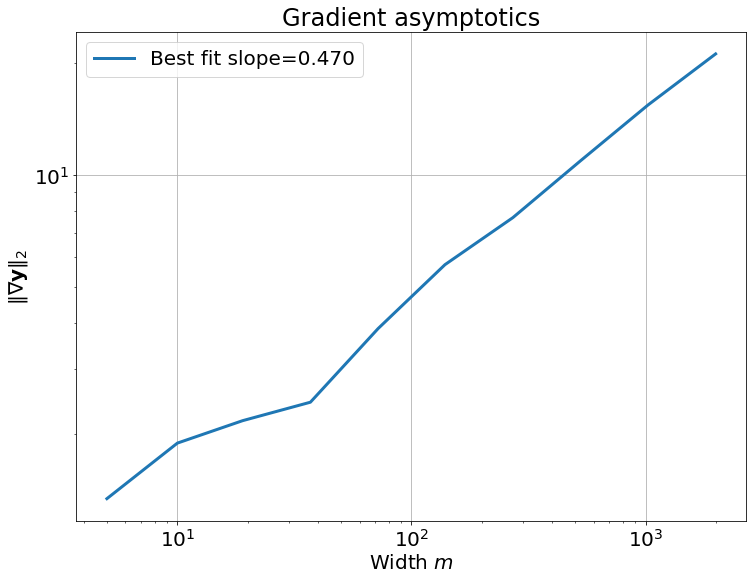

In [10]:
loglog()
plot(ms, gnorms, label=f"Best fit slope={st.linregress(log(ms), log(gnorms))[0]:.3f}")
title("Gradient asymptotics")
xlabel("Width $m$")

ylabel(r"$\Vert \nabla \mathbf{y}\Vert_2$")
legend()
savefig("figs/gradient.png")
show()

## Hessian

We expect $\mathcal{O}(1)$

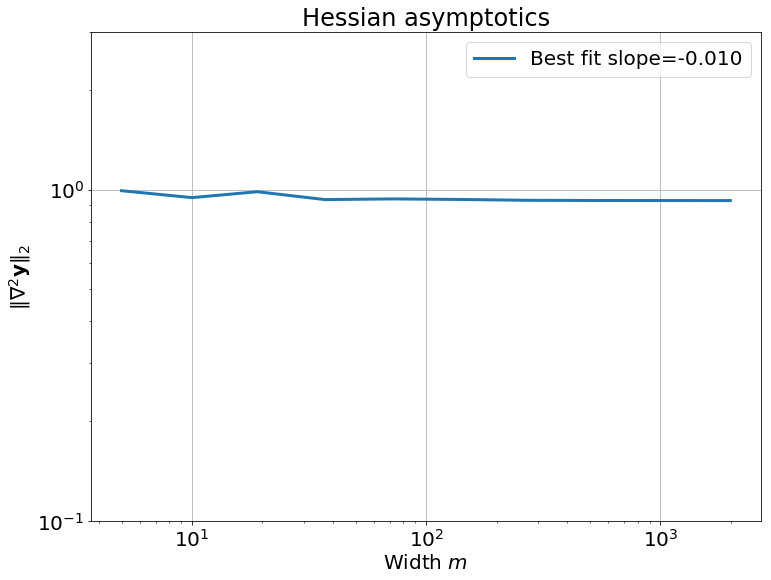

[0.9929463, 0.9462843, 0.985954, 0.93339676, 0.93791854, 0.93436337, 0.92895436, 0.9276325, 0.9273601, 0.9271622]


In [11]:
loglog()
plot(ms, norms, label=f"Best fit slope={st.linregress(log(ms), log(norms))[0]:.3f}")
title("Hessian asymptotics")
xlabel("Width $m$")

ylabel(r"$\Vert \nabla^2 \mathbf{y}\Vert_2$")
legend()
ylim(0.1, 3)
savefig("figs/hessian.png")
show()

print(norms)

## Kappa (inverse relative scale)

We expect $\mathcal{O}(\frac{1}{m})$

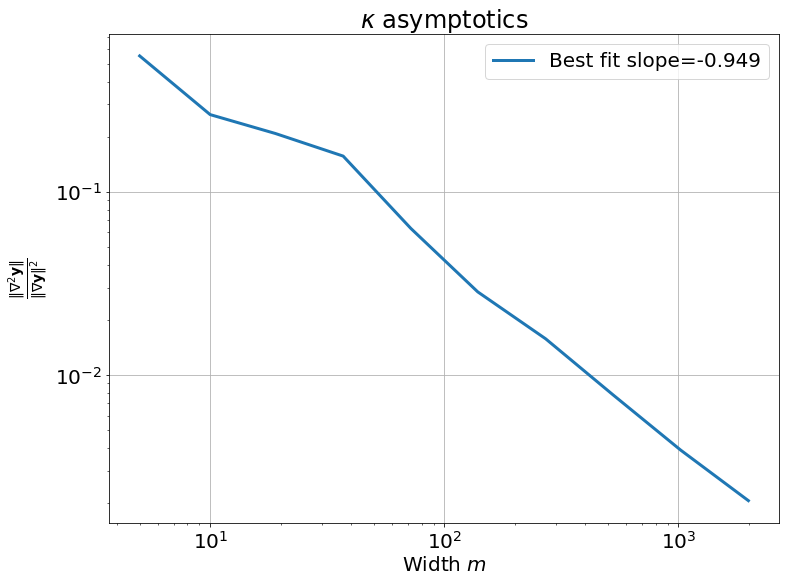

In [12]:
loglog()
title("$\kappa$ asymptotics")
als = array(norms)/(array(gnorms)**2)
plot(ms, als, label=f"Best fit slope={st.linregress(log(ms), log(als))[0]:.3f}")
xlabel("Width $m$")
ylabel(r"$\frac{\Vert \nabla^2 \mathbf{y}\Vert}{\Vert \nabla \mathbf{y}\Vert^2}$")
legend()
savefig("figs/kappa.png")
show()